In [1]:
import numpy as np 
import pandas as pd # csv read in tool
from sklearn.linear_model import LinearRegression # sk-learn's Linear Regression model
from sklearn.model_selection import train_test_split # sk-learn trainning and testing 
from sklearn import metrics # matrics pakages
import matplotlib.pyplot as plt # plotting tool 
import math # Math pakages
from sklearn.metrics import mean_squared_error

Import Data from csv: 

In [2]:
data = pd.read_csv('../input/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data Description: 

* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/House
* sqft_living: square footage of the home
* sqft_lot: square footage of the lot
* floors: Totalfloors (levels) in house
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is ( Overall )
* grade: overall grade given to the housing unit, based on King County grading system
* sqft_above: square footage of house apart from basement
* sqft_basement: square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: zip
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15: lotSize area in 2015(implies-- some renovations)

Set X and Y as dependent and independent Variables: 

In [4]:
X = data[['bedrooms','bathrooms','sqft_living','floors','grade','sqft_basement']]
Y = data['price']

Split the data set to 30% : 70% as testing and trainning:  

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

Get Some Basic Oberservation for relationship beween variables and prices:  

1. turn the return object to matrix

In [6]:
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

* 2. Graph relationship:    
* X = data[['bedrooms','bathrooms','sqft_living','floors','grade','sqft_basement']]

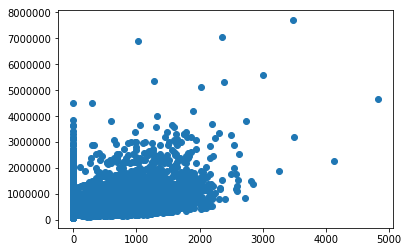

In [7]:
plt.scatter(X.sqft_basement, Y)

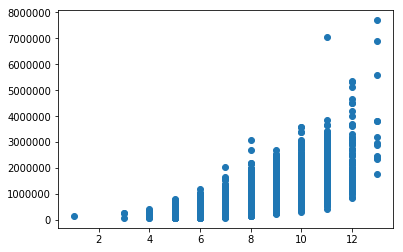

In [8]:
plt.scatter(X.grade, Y)

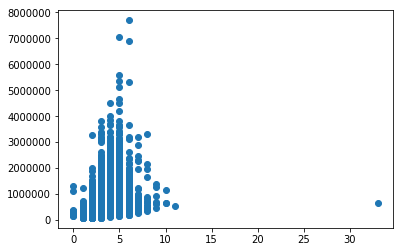

In [9]:
plt.scatter(X.bedrooms, Y)

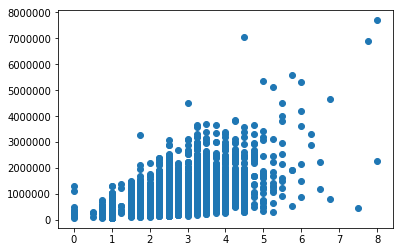

In [10]:
plt.scatter(X.bathrooms, Y)

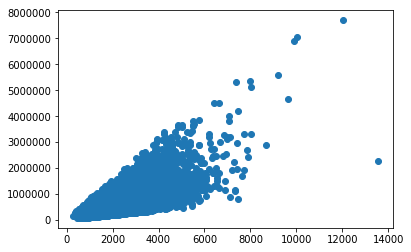

In [11]:
plt.scatter(X.sqft_living, Y)

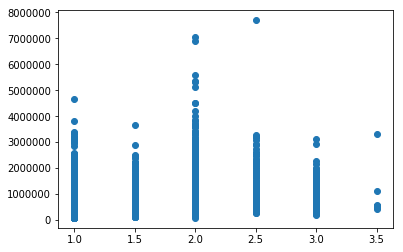

In [12]:
plt.scatter(X.floors, Y)

Start Training the model: 

1. Defined Linear Model: 

In [13]:
Linearmodel = LinearRegression()
Linearmodel.fit(xtrain, ytrain)

Linearmodel.coef_

array([-3.61616118e+04, -2.30823351e+04,  1.89716647e+02, -7.57603120e+03,
        1.08280457e+05,  7.21311388e+01])

2. Output variables coef to excel sheet: 

In [14]:
pd.DataFrame(list(zip(X.columns, Linearmodel.coef_)))

,0,1
0,bedrooms,-36161.611758
1,bathrooms,-23082.335087
2,sqft_living,189.716647
3,floors,-7576.031204
4,grade,108280.457123
5,sqft_basement,72.131139


3. Sample Testing : 
    Let's predict the price of a house that has 2 bedrooms, 1 bathroom, 2500 sqft, 2 floors, condition grade 7 and 0 basedment area 

In [15]:
Linearmodel.predict(np.array([[2, 1, 2500, 2, 7, 0]]))

array([596550.4799683])

3. Trainning Set's Mean Square Error MSE and RAD: 

MSE

In [16]:
predicted = Linearmodel.predict(xtrain)
((predicted-ytrain) ** 2).sum()/len(ytrain)

56999982312.692505

RAD

In [17]:
(abs(predicted-ytrain)/ytrain).sum()/len(ytrain)

0.32794927829650017

4. Testing Set's Mean Square Error MSE and RAD: 

MSE

In [18]:
predicted_test = Linearmodel.predict(xtest)
((predicted_test-ytest) ** 2).sum()/len(ytrain)

29676832034.644478

RAD:

In [19]:
(abs(predicted_test-ytest)/ytest).sum()/len(ytest)

0.32087069234952137